# Quantum Finance - Análise Descritiva e Predições


Este notebook realiza uma análise descritiva (Exploratory Data Analysis - EDA) dos dados de clientes da Quantum Finance. 
Ele inclui a limpeza de dados e uma introdução ao processo de modelagem preditiva.

## Etapas do projeto:

1. **Análise Descritiva (EDA)**: Vamos explorar as características principais dos dados.
2. **Limpeza de Dados**: Tratar valores ausentes e dados inconsistentes.
3. **Machine Learning**: Construção de modelos de machine learning para prever resultados.

## Grupo
- Caroline Lavecchia - RM354620
- Fernando Oliveira - RM348307
- Mateus Marcelino - RM355040

    

# 1 - Importação de Bibliotecas

In [60]:
# Caso ainda não tenha o XGBoost instalado, utilize:
#!pip install xgboost

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix   
from sklearn.impute import SimpleImputer

# Importando a biblioteca para o RandomForest
from sklearn.ensemble import RandomForestClassifier

# Importando a biblioteca XGBoost
from xgboost import XGBClassifier

# Importando as bibliotecas SVM
from sklearn.svm import SVC

# Importando bibliotecas para Rede Neural
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# 2 - Carregando os Dados

In [62]:
# Carregando os dados
url = 'https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/credit%20-%20ok.csv'
data = pd.read_csv(url)

# Exibindo as primeiras linhas
data.head()
    

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


## 2.1 - Limpeza inicial de colunas

Vamos remover colunas que não irão agregar ao nosso modelo de dados

In [63]:
# Removendo colunas que não serão necessárias
data = data.drop(['ID', 'Customer_ID', 'SSN', 'Name'], axis=1)

## 2.2 - Análise Descritiva (EDA)

In [64]:
# Resumo das variáveis
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83144 entries, 0 to 83143
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     83144 non-null  object 
 1   Age                       83144 non-null  object 
 2   Occupation                83144 non-null  object 
 3   Annual_Income             83144 non-null  object 
 4   Monthly_Inhand_Salary     70703 non-null  float64
 5   Num_Bank_Accounts         83144 non-null  int64  
 6   Num_Credit_Card           83144 non-null  int64  
 7   Interest_Rate             83144 non-null  int64  
 8   Num_of_Loan               83144 non-null  object 
 9   Type_of_Loan              73622 non-null  object 
 10  Delay_from_due_date       83144 non-null  int64  
 11  Num_of_Delayed_Payment    77339 non-null  object 
 12  Changed_Credit_Limit      83144 non-null  object 
 13  Num_Credit_Inquiries      81528 non-null  float64
 14  Credit

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,70703.000000,83144.000000,83144.000000,83144.000000,83144.000000,81528.000000,83144.000000,83144.000000
mean,4193.869821,16.924059,22.301309,73.209191,21.050382,27.681594,32.298935,1380.861140
std,3187.081513,116.875468,128.481073,470.881900,14.841171,192.442884,5.116523,8243.094161
min,319.556250,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1629.773333,3.000000,4.000000,8.000000,10.000000,3.000000,28.063496,30.403233
50%,3081.977500,6.000000,6.000000,13.000000,18.000000,6.000000,32.333159,68.966090
75%,5947.320000,7.000000,7.000000,20.000000,28.000000,9.000000,36.517910,160.321434
max,15204.633330,1798.000000,1499.000000,5789.000000,67.000000,2597.000000,50.000000,82331.000000


## 2.3 - Distribuição das Variáveis Numéricas e Categóricas

Distribuição de Month:
Month
February    10394
January     10393
March       10393
April       10393
May         10393
June        10393
July        10393
August      10392
Name: count, dtype: int64

Distribuição de Age:
Age
38       2376
31       2368
32       2343
28       2328
26       2322
         ... 
5001        1
2159_       1
6892        1
5996        1
1342        1
Name: count, Length: 1505, dtype: int64

Distribuição de Occupation:
Occupation
_______          5838
Lawyer           5500
Scientist        5268
Architect        5267
Teacher          5237
Mechanic         5207
Media_Manager    5172
Developer        5170
Engineer         5169
Entrepreneur     5147
Doctor           5147
Manager          5083
Accountant       5062
Journalist       5057
Writer           4968
Musician         4852
Name: count, dtype: int64

Distribuição de Annual_Income:
Annual_Income
36585.12     16
17273.83     16
33029.66     15
17816.75     15
40341.16     14
             ..
15655910      1
72200

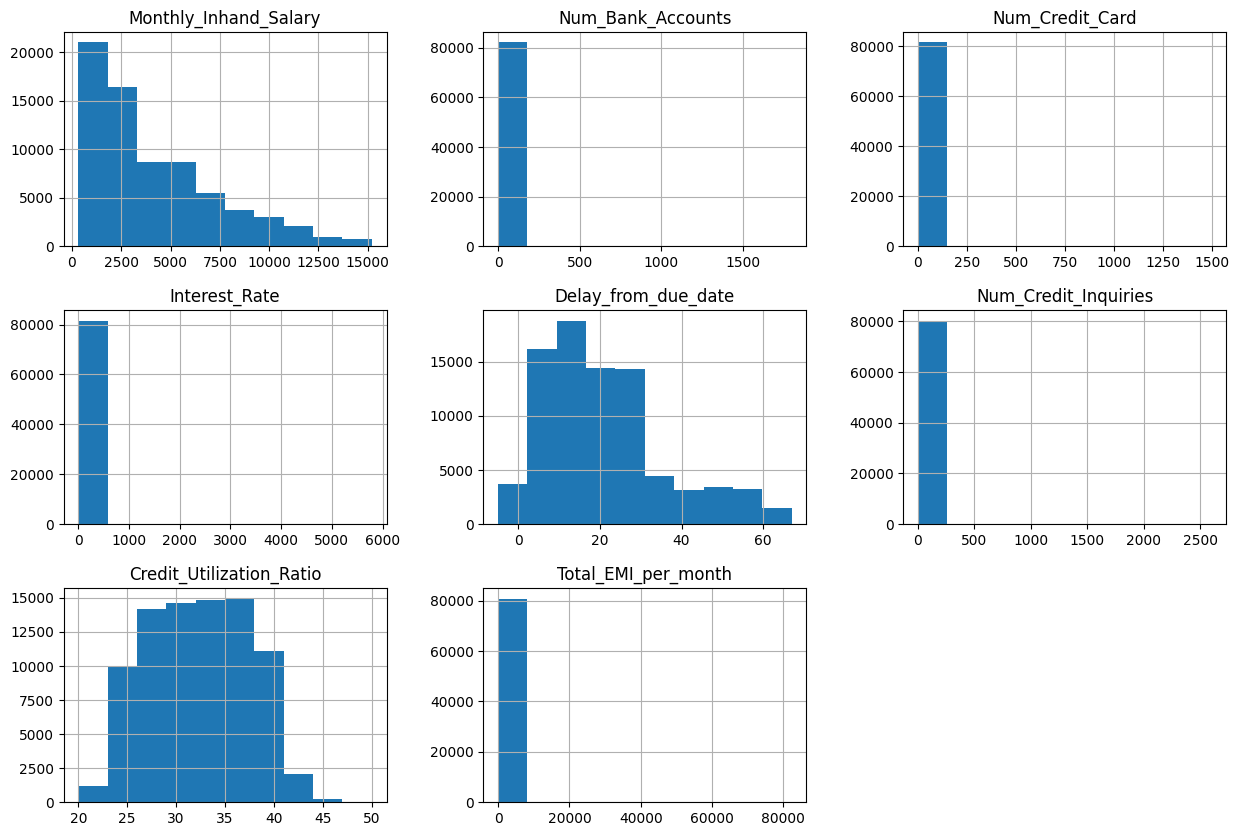

In [65]:
# Distribuição das variáveis categóricas
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Distribuição de {col}:")
    print(data[col].value_counts())
    print()

# Distribuição das variáveis numéricas
data.hist(figsize=(15, 10))
plt.show()    

## 2.4 - Limpeza de Dados


**Trade-offs**: 
- Devemos decidir como lidar com valores ausentes e inconsistências (por exemplo, idades negativas).
- Podemos remover linhas inteiras ou tentar imputar valores faltantes com base em médias, medianas, etc.

Neste caso, vamos optar por remover linhas com valores ausentes para simplificar a análise inicial.

    

In [66]:
# Verificando quantos valores faltantes há
data.isnull().sum()  

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       12441
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 9522
Delay_from_due_date             0
Num_of_Delayed_Payment       5805
Changed_Credit_Limit            0
Num_Credit_Inquiries         1616
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           7485
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3689
Payment_Behaviour               0
Monthly_Balance              1019
Credit_Score                    0
dtype: int64

In [67]:
# Removendo valores ausentes
data_clean = data.dropna()

# Verificando novamente se há valores ausentes
data_clean.isnull().sum()   

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

## 2.5 - Engenharia de Features


**Trade-offs**: 
- Para variáveis categóricas, podemos usar técnicas como One-Hot Encoding ou Label Encoding. 
- Escolhemos Label Encoding por ser mais simples e rápido, mas pode não capturar relações complexas nas variáveis.

Neste exemplo, aplicamos Label Encoding nas variáveis categóricas.
    

In [68]:
# Aplicando Label Encoding usando .loc para evitar o aviso
label_enc = LabelEncoder()
for col in categorical_cols:
    data_clean.loc[:, col] = label_enc.fit_transform(data_clean[col])

# Verificando os dados após Label Encoding
data_clean.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,177,12,3921,1824.843333,3,4,3,137,112,...,3,8802,26.822620,180,1,49.574949,41950,3,22280,0
6,4,177,12,3921,1824.843333,3,4,3,137,112,...,1,8802,22.537593,188,1,49.574949,13151,6,8519,0
8,3,257,15,6766,3037.986667,2,4,6,1,586,...,1,7939,24.464031,236,1,18.816215,968,6,38521,2
9,2,244,13,6766,3037.986667,2,4,6,1,586,...,1,7939,38.550848,237,1,18.816215,28026,1,39180,0
10,6,244,13,6767,3037.986667,2,1385,6,1,586,...,3,7939,33.224951,238,1,18.816215,35110,1,38300,2


# 3 - Divisão dos Dados em Treino e Teste

In [69]:
# Separando os dados em variáveis independentes (X) e dependentes (y)
X = data_clean.drop('Credit_Score', axis=1)  # Substituir pela coluna alvo correta
y = data_clean['Credit_Score']  # Substituir pela coluna alvo correta

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)   

# 4 - Modelagem Preditiva - RandomForest

Acurácia no treino: 0.9999708641687547
Acurácia no teste: 0.7604350781781102


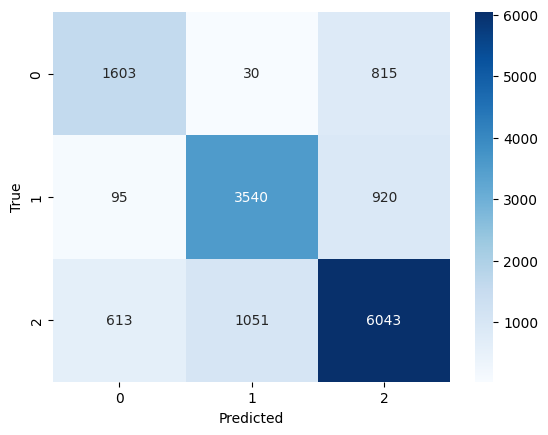

In [70]:

# Supondo que X seja seu dataframe com as features e y seja a variável target

# Verifique se 'y' é categórico e converta se necessário
if y.dtype == 'float' or y.dtype == 'int':  # Se y for contínuo, transformá-lo em categorias
    y = pd.cut(y, bins=3, labels=[0, 1, 2])  # Exemplo de binarização (ajuste os 'bins' conforme necessário)

# Se 'y' for categórico (texto), aplicamos Label Encoding
if y.dtype == 'object':
    label_enc = LabelEncoder()
    y = label_enc.fit_transform(y)

# Verifique a forma de y e aplique ravel() se necessário
if len(y.shape) > 1:
    y = y.ravel()

# Passo 1: Tratar valores ausentes
# Vamos usar SimpleImputer para preencher valores ausentes com a média (ou outra estratégia)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Passo 2: Codificar variáveis categóricas
# Usando Label Encoding para variáveis categóricas
label_enc = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_enc.fit_transform(X[col])

# Passo 3: Escalar as variáveis numéricas
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Passo 4: Seleção de Features (opcional)
# Para RandomForestClassifier, podemos usar a importância das features
model = RandomForestClassifier()

# Treinando o modelo com X_scaled e y (após ajustes no target)
model.fit(X_scaled, y)

# Obtendo as importâncias das features
importances = model.feature_importances_

# Filtrando features importantes (exemplo: manter as 10 features mais importantes)
important_features = X_scaled.columns[importances.argsort()[-10:]]
X_filtered = X_scaled[important_features]

# Dividindo os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.3, random_state=42)

# Treinando o modelo com as features selecionadas e pré-processadas
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Avaliando o modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Acurácia no treino:", accuracy_score(y_train, y_pred_train))
print("Acurácia no teste:", accuracy_score(y_test, y_pred_test))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## 4.1 - Conclusões de Negócio


**Trade-offs**: 
- A escolha do modelo (RandomForest) é adequada para esta etapa, pois é um algoritmo robusto. No entanto, poderíamos explorar outros algoritmos como XGBoost ou SVM para comparar resultados.
- Devemos considerar otimizações no modelo, como ajustes de hiperparâmetros e técnicas de feature selection.

**Próximos Passos:**
- Realizar otimizações no modelo.
- Explorar mais técnicas de feature engineering e validar com diferentes algoritmos.   

# 5 - Modelagem Preditiva - Xgboost

C:\Users\Mateus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [13:31:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia no treino: 0.8395781131635686
Acurácia no teste: 0.7382053025152957

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      5488
           1       0.83      0.83      0.83     10737
           2       0.85      0.86      0.85     18097

    accuracy                           0.84     34322
   macro avg       0.83      0.83      0.83     34322
weighted avg       0.84      0.84      0.84     34322


Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2448
           1       0.75      0.73      0.74      4555
           2       0.75      0.77      0.76      7707

    accuracy                           0.74     14710
   macro avg       0.72      0.72      0.72     14710
weighted avg       0.74      0.74      0.74     14710



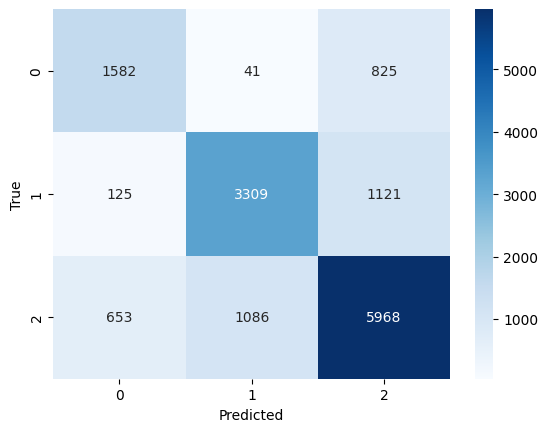

In [71]:
# Criando o modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Avaliando o modelo
print("Acurácia no treino:", accuracy_score(y_train, y_pred_train))
print("Acurácia no teste:", accuracy_score(y_test, y_pred_test))

# Relatórios de classificação
print("\nRelatório de Classificação (Treino):")
print(classification_report(y_train, y_pred_train))
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_test))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 6 - SVM (Support Vector Machine)

Acurácia no treino: 0.6506322475380223
Acurácia no teste: 0.6397008837525493

Relatório de Classificação (Treino):
              precision    recall  f1-score   support

           0       0.50      0.62      0.55      5488
           1       0.69      0.53      0.60     10737
           2       0.69      0.73      0.71     18097

    accuracy                           0.65     34322
   macro avg       0.62      0.63      0.62     34322
weighted avg       0.66      0.65      0.65     34322


Relatório de Classificação (Teste):
              precision    recall  f1-score   support

           0       0.49      0.61      0.54      2448
           1       0.68      0.52      0.59      4555
           2       0.67      0.72      0.70      7707

    accuracy                           0.64     14710
   macro avg       0.62      0.62      0.61     14710
weighted avg       0.65      0.64      0.64     14710



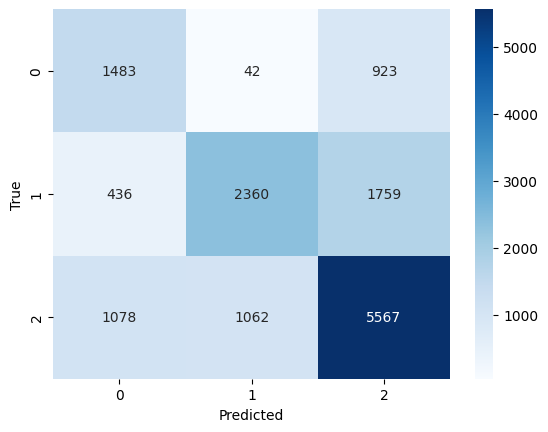

In [72]:
# Normalizando os dados com StandardScaler
scaler = StandardScaler()

# Ajustando e transformando os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Apenas transformando os dados de teste com base nos dados de treino
X_test_scaled = scaler.transform(X_test)

# Criando o modelo SVM
model = SVC()

# Treinando o modelo com os dados normalizados
model.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Avaliando o modelo
print("Acurácia no treino:", accuracy_score(y_train, y_pred_train))
print("Acurácia no teste:", accuracy_score(y_test, y_pred_test))

# Relatórios de classificação
print("\nRelatório de Classificação (Treino):")
print(classification_report(y_train, y_pred_train))
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_test))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 7 - Rede neural - multiclasse

## 7.1 - Definindo as camadas da RN

In [73]:
# 10 | 15 | 15 | 3

# Create a neural network model using the Sequential API
model = Sequential()
model.add(Dense(15, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(15, activation='relu'))
model.add(Dense(3, activation='softmax'))  # output layer with 3 neurons and softmax activation

C:\Users\Mateus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 7.2 Compilando o modelo

In [74]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 7.3 - Treinando a rede neural

In [75]:
# Train the model
model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=128, validation_data=(X_test, to_categorical(y_test)))

Epoch 1/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5041 - loss: 1.0155 - val_accuracy: 0.5878 - val_loss: 0.8836
Epoch 2/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5920 - loss: 0.8615 - val_accuracy: 0.5950 - val_loss: 0.8430
Epoch 3/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5982 - loss: 0.8340 - val_accuracy: 0.6057 - val_loss: 0.8295
Epoch 4/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6127 - loss: 0.8215 - val_accuracy: 0.6102 - val_loss: 0.8219
Epoch 5/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6112 - loss: 0.8165 - val_accuracy: 0.6124 - val_loss: 0.8163
Epoch 6/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6175 - loss: 0.8059 - val_accuracy: 0.6166 - val_loss: 0.8113
Epoch 7/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6152 - loss: 0.8037 - val_accuracy: 0.6174 - val_loss: 0.8067
Epoch 8/10
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6228 - loss: 0.7936 - val_accuracy: 0.

## 7.4 Testando o modelo com dados de treino

In [76]:
loss, accuracy = model.evaluate(X_train, to_categorical(y_train))
print(f'Acurácia de Treino: {accuracy:.2f}')

1073/1073 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.6270 - loss: 0.7782
Acurácia de Treino: 0.63


## 7.5 - Predizendo resultados de teste

In [81]:
# Validando o modelo com dados de teste
loss, accuracy = model.evaluate(X_test, to_categorical(y_test))
print(f'Acurácia de Teste: {accuracy:.2f}')

# Predict the labels of the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6283 - loss: 0.7840
Acurácia de Teste: 0.62
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step


## 7.6 Relatorio de classificacao

In [80]:
# Convertendo os validos previstos de volta para sua classe original
y_pred = le.inverse_transform(y_pred)

# Imprimindo o relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.39      0.44      2448
           1       0.62      0.60      0.61      4555
           2       0.65      0.71      0.67      7707

    accuracy                           0.62     14710
   macro avg       0.59      0.57      0.58     14710
weighted avg       0.62      0.62      0.62     14710

